In tis project we  analyze the movie dataset and try to find correlations within the attributes

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [72]:
# Read the dataset
df = pd.read_csv(r'C:\Users\Gaurav\OneDrive\Documents\movies_data.csv')

df.head()

,name,rating,genre,released_year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


DATA MODIFICATIONS

In [98]:
# Change data type of few columns

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['released_year'] = df['released_year'].astype('int64')

In [99]:
df

,name,rating,genre,released_year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.400000,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.800000,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.700000,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.700000,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.300000,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020",3.100000,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Dow Jazz Films,90
7664,Dream Round,R,Comedy,2020,"February 7, 2020",4.700000,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90
7665,Saving Mbango,R,Drama,2020,"April 27, 2020",5.700000,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107
7666,It's Just Us,R,Drama,2020,"October 1, 2020",6.390411,88108,James Randall,James Randall,Christina Roz,United States,15000,78500541,Embi Productions,120


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7668 entries, 5445 to 3203
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7668 non-null   int16  
 1   rating         7668 non-null   int8   
 2   genre          7668 non-null   int8   
 3   released_year  7668 non-null   int64  
 4   released       7668 non-null   int16  
 5   score          7668 non-null   float64
 6   votes          7668 non-null   int64  
 7   director       7668 non-null   int16  
 8   writer         7668 non-null   int16  
 9   star           7668 non-null   int16  
 10  country        7668 non-null   int8   
 11  budget         7668 non-null   int64  
 12  gross          7668 non-null   int64  
 13  company        7668 non-null   int16  
 14  runtime        7668 non-null   int64  
dtypes: float64(1), int16(6), int64(5), int8(3)
memory usage: 531.7 KB


In [80]:
# Identify missing data 
df.isnull().sum()

name                0
rating             77
genre               0
released_year       2
released            2
score               3
votes               3
director            0
writer              3
star                1
country             3
budget           2171
gross             189
company            17
runtime             4
dtype: int64

In [82]:
#Handle missing data

df['rating']= df['rating'].fillna(method = 'ffill')

In [94]:
df['released_year'] = df['released_year'].fillna(method='ffill')

In [83]:
df['released'] = df['released'].fillna(method='ffill')

In [84]:
df['score']= df['score'].fillna(df['score'].mean())

In [85]:
df['votes']= df['votes'].fillna(df['votes'].mean())

In [86]:
df['writer'] = df['writer'].fillna(method='ffill')

In [87]:
df['star'] = df['star'].fillna(method='ffill')

In [88]:
df['country'] = df['country'].fillna(method='ffill')

In [89]:
df['budget']= df['budget'].fillna(df['budget'].mean())

In [90]:
df['gross']= df['gross'].fillna(df['gross'].mean())

In [91]:
df['company'] = df['company'].fillna(method='ffill')

In [92]:
df['runtime']= df['runtime'].fillna(df['runtime'].mean())

In [95]:
df.isnull().sum()

name             0
rating           0
genre            0
released_year    0
released         0
score            0
votes            0
director         0
writer           0
star             0
country          0
budget           0
gross            0
company          0
runtime          0
dtype: int64

In [104]:
# To display all rows 
pd.set_option('display.max_rows', None)

In [106]:
# Sort in descending order of gross revenues
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

CORRELATION

In [116]:
df.corr()

,released_year,score,votes,budget,gross,runtime
released_year,1.000000,0.008402,-0.037887,-0.015612,-0.031340,-0.018545
score,0.008402,1.000000,0.409182,0.064541,0.182868,0.399335
votes,-0.037887,0.409182,1.000000,0.421007,0.628713,0.309168
budget,-0.015612,0.064541,0.421007,1.000000,0.711270,0.265289
gross,-0.031340,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,-0.018545,0.399335,0.309168,0.265289,0.241336,1.000000


There is a high correlation between budget-gross & votes-gross

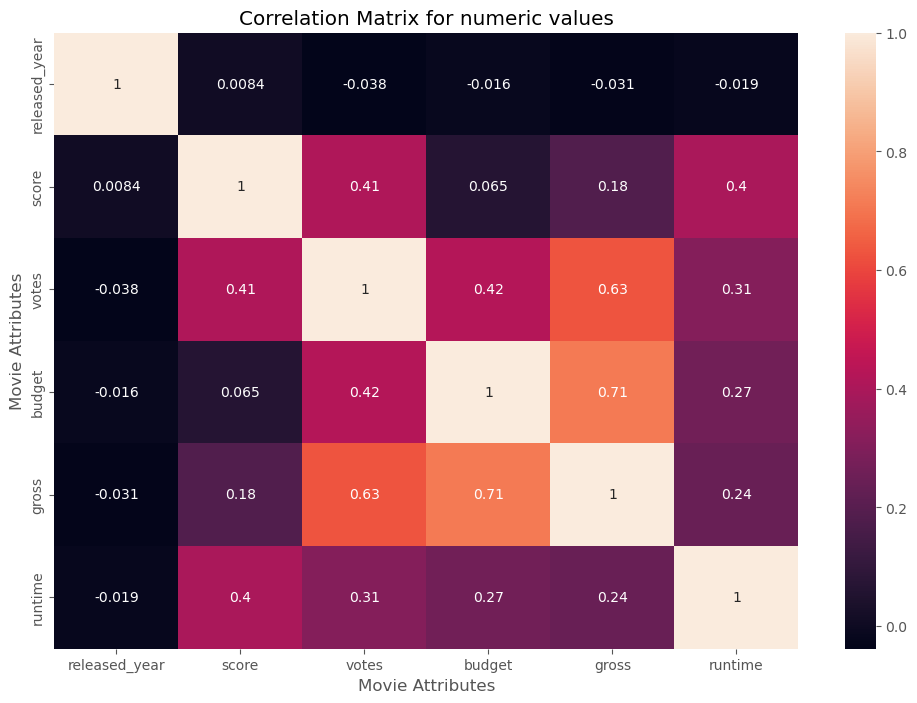

In [121]:
#Plot heatmap
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title("Correlation Matrix for numeric values")
plt.xlabel("Movie Attributes")
plt.ylabel("Movie Attributes")
plt.show()

[Text(0.5, 1.0, 'Correlation between Budget & Gross Earnings')]

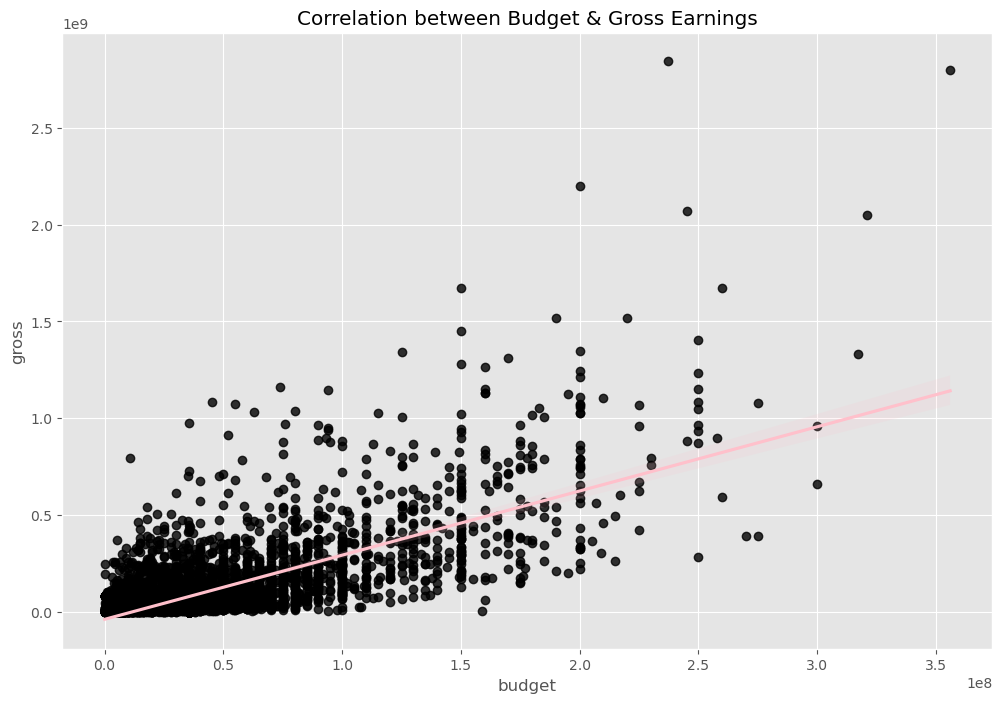

In [115]:
#PLot budget and gross earnings

sns.regplot(x='budget', y='gross', data = df, scatter_kws = {"color": "black"}, line_kws={"color": "pink"}).set(title = "Correlation between Budget & Gross Earnings")

As anticiapted, there is a strong correlation between budget and gross earnings

[Text(0.5, 1.0, 'Correlation between Votes & Gross Earnings')]

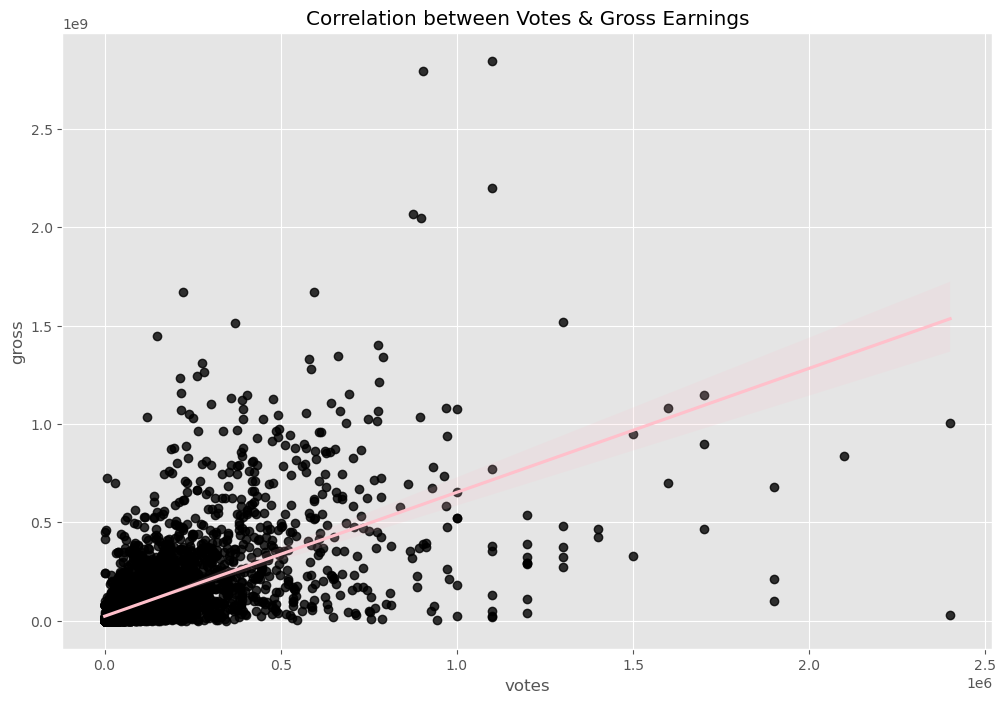

In [122]:
# Plot votes and gross earnings 

sns.regplot(x='votes', y='gross', data = df, scatter_kws = {"color": "black"}, line_kws={"color": "pink"}).set(title = "Correlation between Votes & Gross Earnings")

As anticiapted, there is a strong correlation between votes and gross earnings

Now we use the non-numeric attributes

In [129]:
# We assign a unique code to each non-numeric attribute by changing it into a categorical value

df_numerized = df

for col_name in df_numerized:
    if(df_numerized[col_name].dtype== 'object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,released_year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,611,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,153,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,617,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,613,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,161,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


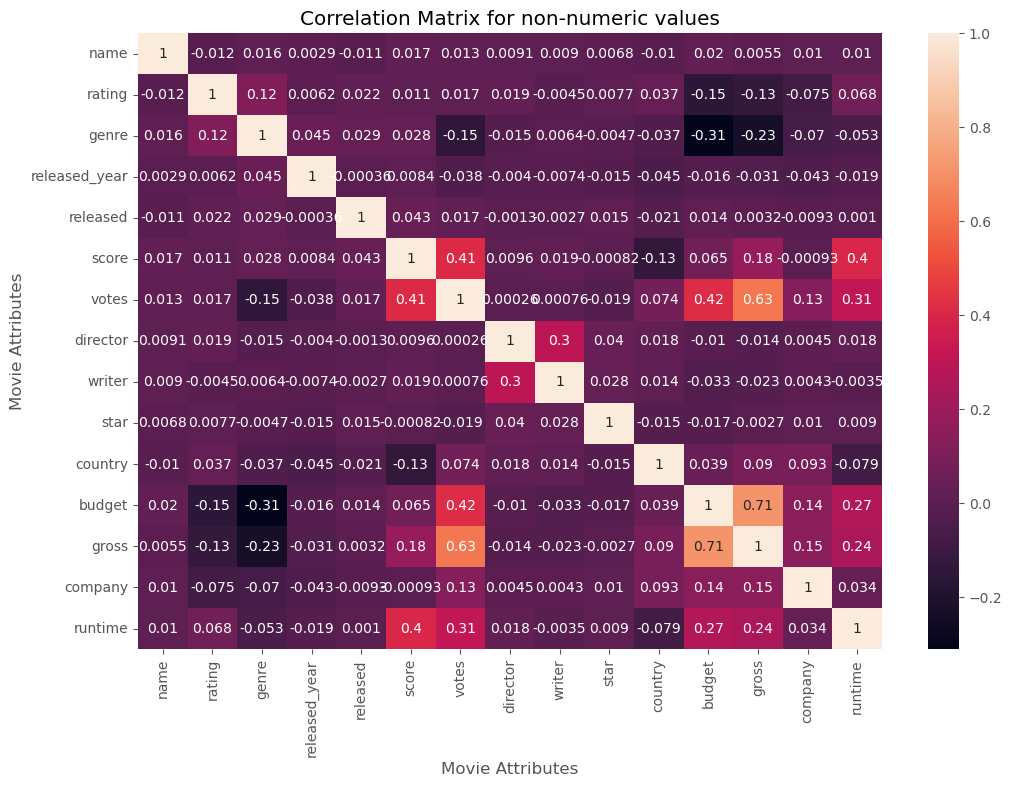

In [127]:
#Plot heatmap
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title("Correlation Matrix for non-numeric values")
plt.xlabel("Movie Attributes")
plt.ylabel("Movie Attributes")
plt.show()

In [128]:
#Unstacking

corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

name           name             1.000000
               rating          -0.011776
               genre            0.016355
               released_year    0.002940
               released        -0.010836
               score            0.017095
               votes            0.013086
               director         0.009079
               writer           0.009033
               star             0.006820
               country         -0.010127
               budget           0.020368
               gross            0.005466
               company          0.009980
               runtime          0.010386
rating         name            -0.011776
               rating           1.000000
               genre            0.116837
               released_year    0.006215
               released         0.021737
               score            0.011322
               votes            0.017057
               director         0.018842
               writer          -0.004470
               s

Other attributes do not have a high correlation with the gross earnings 